In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import imdb

In [15]:
(xtrain, ytrain),(xtest, ytest) = imdb.load_data(num_words=10000)

In [16]:
# vectorize the input data
def vectorize(sequence_list, dimensions = 10000):
    result = np.zeros(shape = (sequence_list.shape[0], dimensions))
    for i in range(sequence_list.shape[0]):
        for j in sequence_list[i]:
            result[i,j] = 1.
    return result

In [17]:
xtrain = vectorize(xtrain)
xtest  = vectorize(xtest)

In [18]:
ytrain = np.asarray(ytrain).astype('float32')
ytest  = np.asarray(ytest).astype('float32')

In [19]:
# Create the model
model = tf.keras.Sequential()

In [20]:
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1,  activation = 'sigmoid'))

In [21]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.1),
             loss = tf.keras.losses.binary_crossentropy,
             metrics = ['accuracy'])

In [22]:
history = model.fit(xtrain, ytrain, epochs = 20, batch_size = 512, validation_split = 0.25)

Epoch 1/20
37/37 [==============================] - 1s 23ms/step - loss: 7.7166 - accuracy: 0.6948 - val_loss: 0.4721 - val_accuracy: 0.7794
Epoch 2/20
37/37 [==============================] - 1s 14ms/step - loss: 0.4456 - accuracy: 0.8187 - val_loss: 0.4232 - val_accuracy: 0.8189
Epoch 3/20
37/37 [==============================] - 1s 14ms/step - loss: 0.3451 - accuracy: 0.8710 - val_loss: 0.4362 - val_accuracy: 0.8445
Epoch 4/20
37/37 [==============================] - 1s 14ms/step - loss: 0.2968 - accuracy: 0.8948 - val_loss: 0.4229 - val_accuracy: 0.8750
Epoch 5/20
37/37 [==============================] - 1s 14ms/step - loss: 0.2272 - accuracy: 0.9206 - val_loss: 0.3557 - val_accuracy: 0.8776
Epoch 6/20
37/37 [==============================] - 1s 14ms/step - loss: 0.2077 - accuracy: 0.9315 - val_loss: 0.3429 - val_accuracy: 0.8827
Epoch 7/20
37/37 [==============================] - 1s 14ms/step - loss: 0.1887 - accuracy: 0.9418 - val_loss: 0.5373 - val_accuracy: 0.8557
Epoch 8/20
37

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
x = np.arange(1,21)

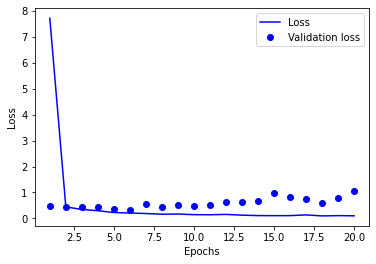

In [25]:
plt.plot(x, history.history['loss'], 'b', label='Loss')
plt.plot(x, history.history['val_loss'], 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

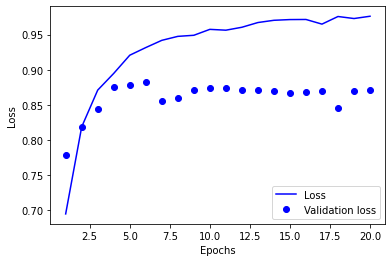

In [26]:
plt.plot(x, history.history['accuracy'], 'b', label='Loss')
plt.plot(x, history.history['val_accuracy'], 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
model.predict(xtest)

array([[1.2538406e-03],
       [9.9991155e-01],
       [8.3709687e-01],
       ...,
       [6.6932080e-06],
       [3.3779763e-09],
       [1.2896142e-07]], dtype=float32)

In [30]:
predictions = model.predict(xtest)

In [42]:
predictions

array([[1.2538406e-03],
       [9.9991155e-01],
       [8.3709687e-01],
       ...,
       [6.6932080e-06],
       [3.3779763e-09],
       [1.2896142e-07]], dtype=float32)